In [1]:
##### Copyright 2021 The Cirq Developers

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Named Topologies

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/named_topologies"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/main/docs/named_topologies.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/main/docs/named_topologies.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/named_topologies.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

In [3]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    
import cirq

installing cirq...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jsonschema 4.22.0 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
jupyterlab 4.2.1 requires httpx>=0.25.0, but you have httpx 0.23.3 which is incompatible.
referencing 0.35.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


installed cirq.


In [4]:
from typing import Iterable, List, Optional, Sequence

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## TiltedSquareLattice

This is a grid lattice rotated 45-degrees.

This topology is based on Google devices where plaquettes consist of four qubits in a square
connected to a central qubit:

    x   x
      x
    x   x

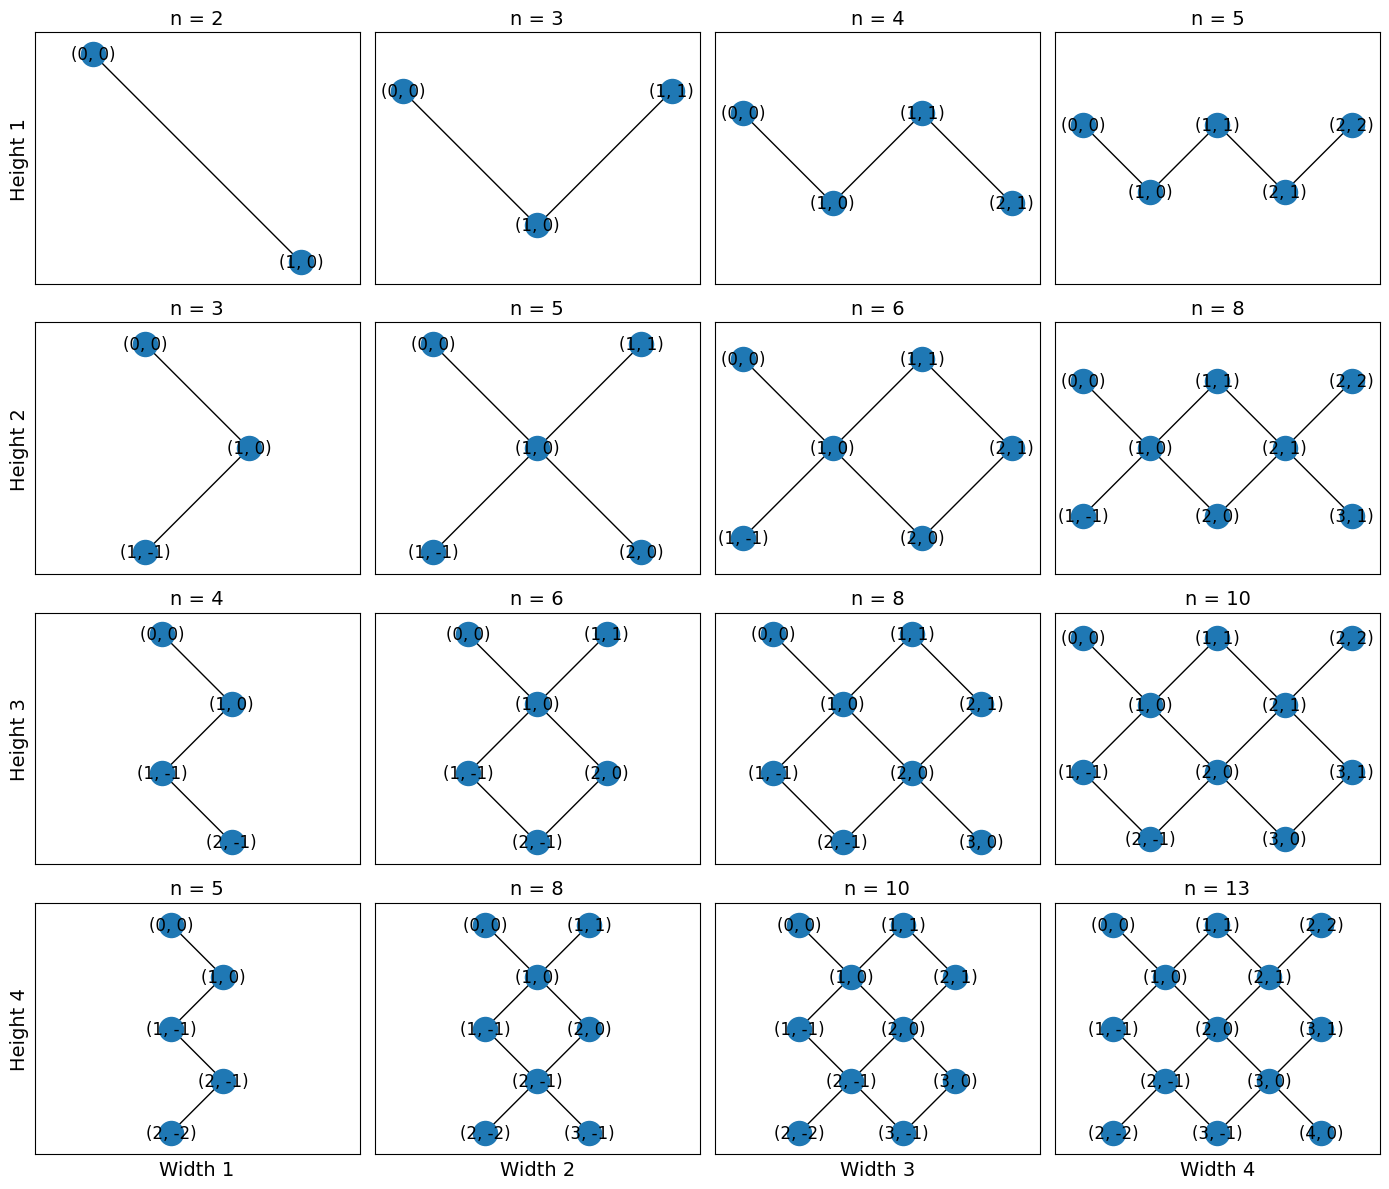

In [5]:
import itertools
from cirq import TiltedSquareLattice

side_lens = np.arange(1, 4+1)
l = len(side_lens)

fig, axes = plt.subplots(l, l, figsize=(3.5*l, 3*l))
for widthi, heighti in itertools.product(np.arange(l), repeat=2):
    width = side_lens[widthi]
    height = side_lens[heighti]
    ax = axes[heighti, widthi]
    topo = TiltedSquareLattice(width, height)
    topo.draw(ax=ax, tilted=False)
        
    if widthi == 0:
        ax.set_ylabel(f'Height {height}', fontsize=14)
    if heighti == l-1:
        ax.set_xlabel(f'Width {width}', fontsize=14)
    
    ax.set_title(f'n = {topo.n_nodes}', fontsize=14)
        
fig.tight_layout()

The corner nodes are not connected to each other. `width` and `height` refer to the rectangle
formed by rotating the lattice 45 degrees. `width` and `height` are measured in half-unit
cells, or equivalently half the number of central nodes.

Nodes are 2-tuples of integers which may be negative. Please see `get_placements` for
mapping this topology to a GridQubit Device.

## Placement

In [6]:
import networkx as nx
SYC23_GRAPH = nx.from_edgelist([
    ((3, 2), (4, 2)), ((4, 1), (5, 1)), ((4, 2), (4, 1)), 
    ((4, 2), (4, 3)), ((4, 2), (5, 2)), ((4, 3), (5, 3)), 
    ((5, 1), (5, 0)), ((5, 1), (5, 2)), ((5, 1), (6, 1)), 
    ((5, 2), (5, 3)), ((5, 2), (6, 2)), ((5, 3), (5, 4)), 
    ((5, 3), (6, 3)), ((5, 4), (6, 4)), ((6, 1), (6, 2)), 
    ((6, 2), (6, 3)), ((6, 2), (7, 2)), ((6, 3), (6, 4)), 
    ((6, 3), (7, 3)), ((6, 4), (6, 5)), ((6, 4), (7, 4)), 
    ((6, 5), (7, 5)), ((7, 2), (7, 3)), ((7, 3), (7, 4)), 
    ((7, 3), (8, 3)), ((7, 4), (7, 5)), ((7, 4), (8, 4)), 
    ((7, 5), (7, 6)), ((7, 5), (8, 5)), ((8, 3), (8, 4)), 
    ((8, 4), (8, 5)), ((8, 4), (9, 4)), 
])

You can manually generate mappings between `NamedTopology` nodes and device qubits using helper functions.

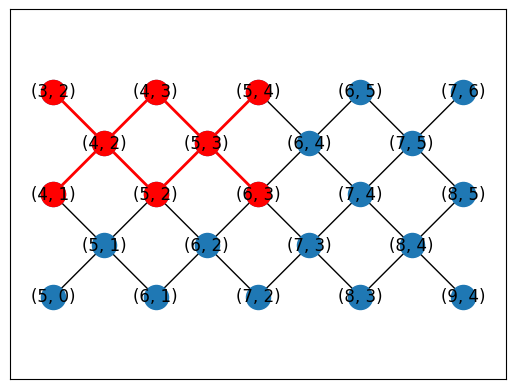

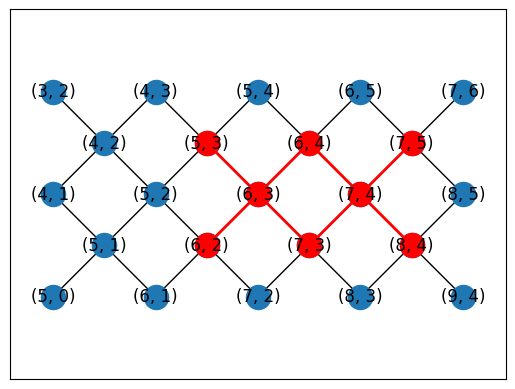

In [7]:
topo = TiltedSquareLattice(4, 2)

cirq.draw_placements(SYC23_GRAPH, topo.graph, [
    topo.nodes_to_gridqubits(offset=(3,2)),
    topo.nodes_to_gridqubits(offset=(5,3)),
], tilted=False)

Or you can automatically generate placements using a subgraph monomorphism algorithm in NetworkX.

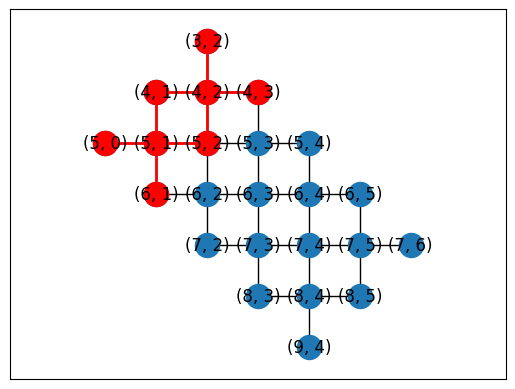

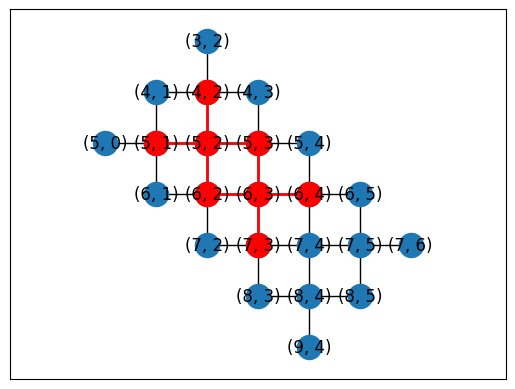

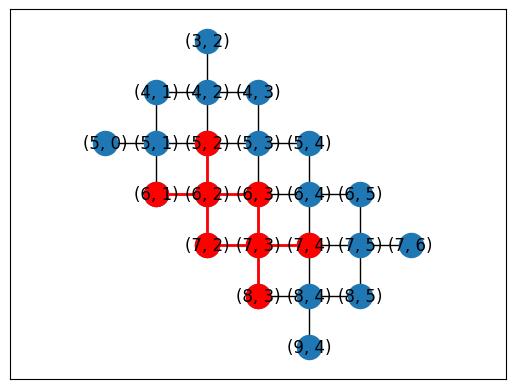

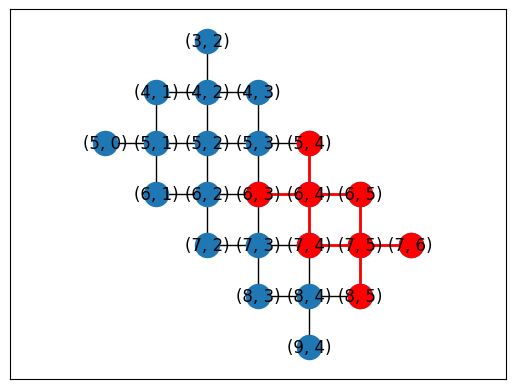

...

12 total placements


In [8]:
topo = TiltedSquareLattice(4, 2)
placements = cirq.get_placements(SYC23_GRAPH, topo.graph)
cirq.draw_placements(SYC23_GRAPH, topo.graph, placements[::3])
print('...\n')
print(f'{len(placements)} total placements')

## LineTopology

This is a 1D linear topology.

Node indices are contiguous integers starting from 0 with edges between
adjacent integers.


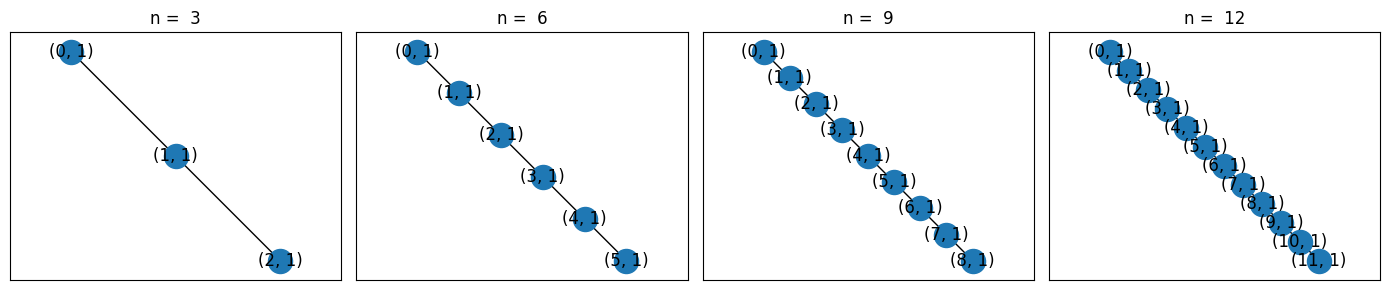

In [9]:
from cirq import LineTopology

lens = np.arange(3, 12+1, 3)
l = len(lens)
fig, axes = plt.subplots(1,l, figsize=(3.5*l, 3*1))

for ax, n_nodes in zip(axes, lens):
    LineTopology(n_nodes).draw(ax=ax, tilted=False)
    ax.set_title(f'n =  {n_nodes}')
    
fig.tight_layout()

### Manual placement

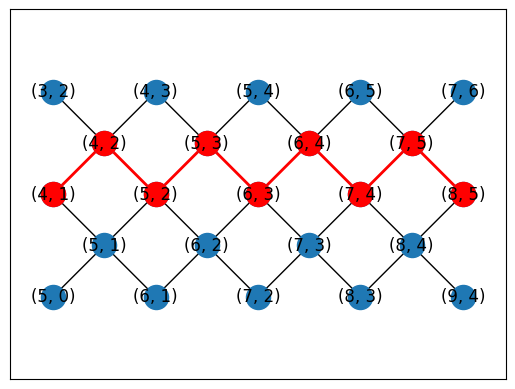

In [10]:
topo = LineTopology(9)

cirq.draw_placements(SYC23_GRAPH, topo.graph, [
    {i: q for i, q in enumerate([
        cirq.GridQubit(4, 1), cirq.GridQubit(4, 2), cirq.GridQubit(5, 2), 
        cirq.GridQubit(5, 3), cirq.GridQubit(6, 3), cirq.GridQubit(6, 4), 
        cirq.GridQubit(7, 4), cirq.GridQubit(7, 5), cirq.GridQubit(8, 5),                              
    ])}
], tilted=False)

### Automatic placement

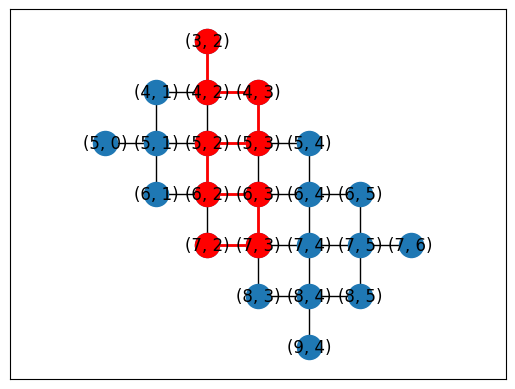

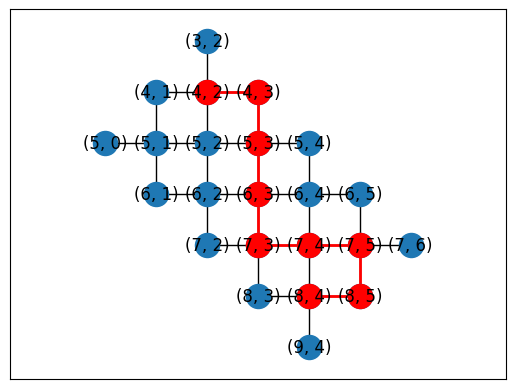

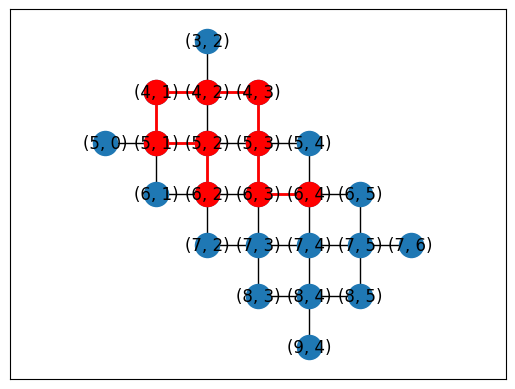

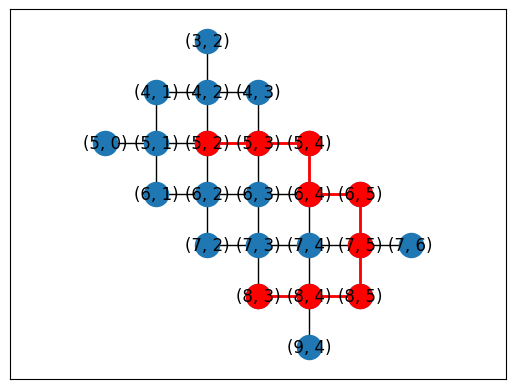

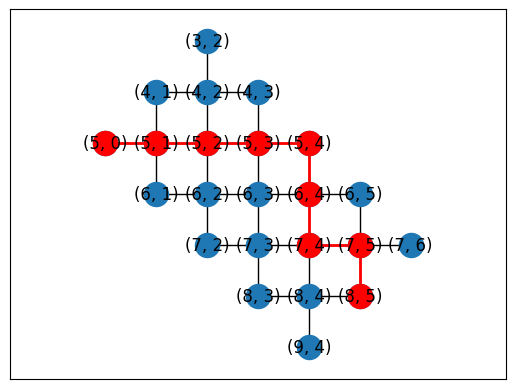

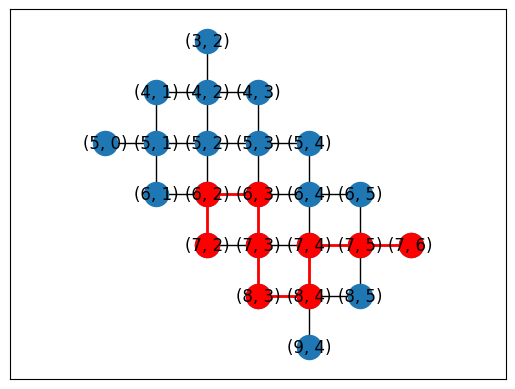

...

1615 total placements


In [11]:
topo = LineTopology(9)
placements = cirq.get_placements(SYC23_GRAPH, topo.graph)
cirq.draw_placements(SYC23_GRAPH, topo.graph, placements[::300])
print('...\n')
print(f'{len(placements)} total placements')